# Importing dataset

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file while seperating the data 
unclean_data = pd.read_csv("Portugal_Student_Data.csv", sep = ";")

# Display the first few rows
print(unclean_data.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

Removing variables that we won't be needing to predict drop out

Note: Dimensions are still included in our data and won't be seperated. Dimensions are there just to help with analyzing and dividing work.

In [19]:
#Removing columns

df = unclean_data.drop(columns = ["Nacionality", "Curricular units 2nd sem (credited)", 
                                  "Curricular units 2nd sem (enrolled)",
                                  "Curricular units 2nd sem (evaluations)",
                                  "Curricular units 2nd sem (approved)",
                                  "Curricular units 2nd sem (grade)",
                                  "Curricular units 2nd sem (without evaluations)",
                                  "Curricular units 1st sem (enrolled)",
                                  "Curricular units 1st sem (evaluations)",
                                  "Curricular units 1st sem (approved)",
                                  "Curricular units 1st sem (grade)",
                                  "Curricular units 1st sem (without evaluations)",
                                  "Curricular units 1st sem (credited)"])

print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Mother's qualification  \
0                           122.0                      19   
1                           160.0                       1   
2                           122.0                      37   
3   

# Start EDA

Checking data types and description

In [20]:
#Checking data types to use as a filter to create the correlation matrix
df.dtypes

Marital status                      int64
Application mode                    int64
Application order                   int64
Course                              int64
Daytime/evening attendance\t        int64
Previous qualification              int64
Previous qualification (grade)    float64
Mother's qualification              int64
Father's qualification              int64
Mother's occupation                 int64
Father's occupation                 int64
Admission grade                   float64
Displaced                           int64
Educational special needs           int64
Debtor                              int64
Tuition fees up to date             int64
Gender                              int64
Scholarship holder                  int64
Age at enrollment                   int64
International                       int64
Unemployment rate                 float64
Inflation rate                    float64
GDP                               float64
Target                            

In [21]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,...,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,19.561935,22.275316,10.960895,...,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,15.603186,15.343108,26.418253,...,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,19.000000,19.000000,5.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,44.000000,44.000000,194.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,16.200000,3.700000,3.510000


Checking for NA values
- Appears to have none

In [22]:
print(df.isnull().sum())

Marital status                    0
Application mode                  0
Application order                 0
Course                            0
Daytime/evening attendance\t      0
Previous qualification            0
Previous qualification (grade)    0
Mother's qualification            0
Father's qualification            0
Mother's occupation               0
Father's occupation               0
Admission grade                   0
Displaced                         0
Educational special needs         0
Debtor                            0
Tuition fees up to date           0
Gender                            0
Scholarship holder                0
Age at enrollment                 0
International                     0
Unemployment rate                 0
Inflation rate                    0
GDP                               0
Target                            0
dtype: int64


Standarizing variables because predictive modeling is sensitive to scaling
- Grading scale: https://withportugal.com/en/blog/ensino-superior-2024

In [23]:
# Admission grade is out of 200 in Portugal
# Standardizing will help both the audience understand and modeling results
df['Admission grade'] = df['Admission grade']/2
print(df['Admission grade'].head())

# Doing the same for prev qualification
df['Previous qualification (grade)'] = df['Previous qualification (grade)']/2
print(df['Previous qualification (grade)'].head())

#renaming the same column
df.rename(columns={'Previous qualification (grade)': 'Previous qualification grade'}, inplace=True)


0    63.65
1    71.25
2    62.40
3    59.80
4    70.75
Name: Admission grade, dtype: float64
0    61.0
1    80.0
2    61.0
3    61.0
4    50.0
Name: Previous qualification (grade), dtype: float64


Converting GDP and inflation rates from percentages into decimals

In [24]:
df['GDP'] = df['GDP'] / 100
print(df['GDP'].head())

df['Inflation rate'] = df['Inflation rate'] / 100
print(df['Inflation rate'].head())

df['Unemployment rate'] = df['Unemployment rate'] / 100
print(df['Unemployment rate'].head())

0    0.0174
1    0.0079
2    0.0174
3   -0.0312
4    0.0079
Name: GDP, dtype: float64
0    0.014
1   -0.003
2    0.014
3   -0.008
4   -0.003
Name: Inflation rate, dtype: float64
0    0.108
1    0.139
2    0.108
3    0.094
4    0.139
Name: Unemployment rate, dtype: float64


Visualizing the distribution of variables

<function matplotlib.pyplot.show(close=None, block=None)>

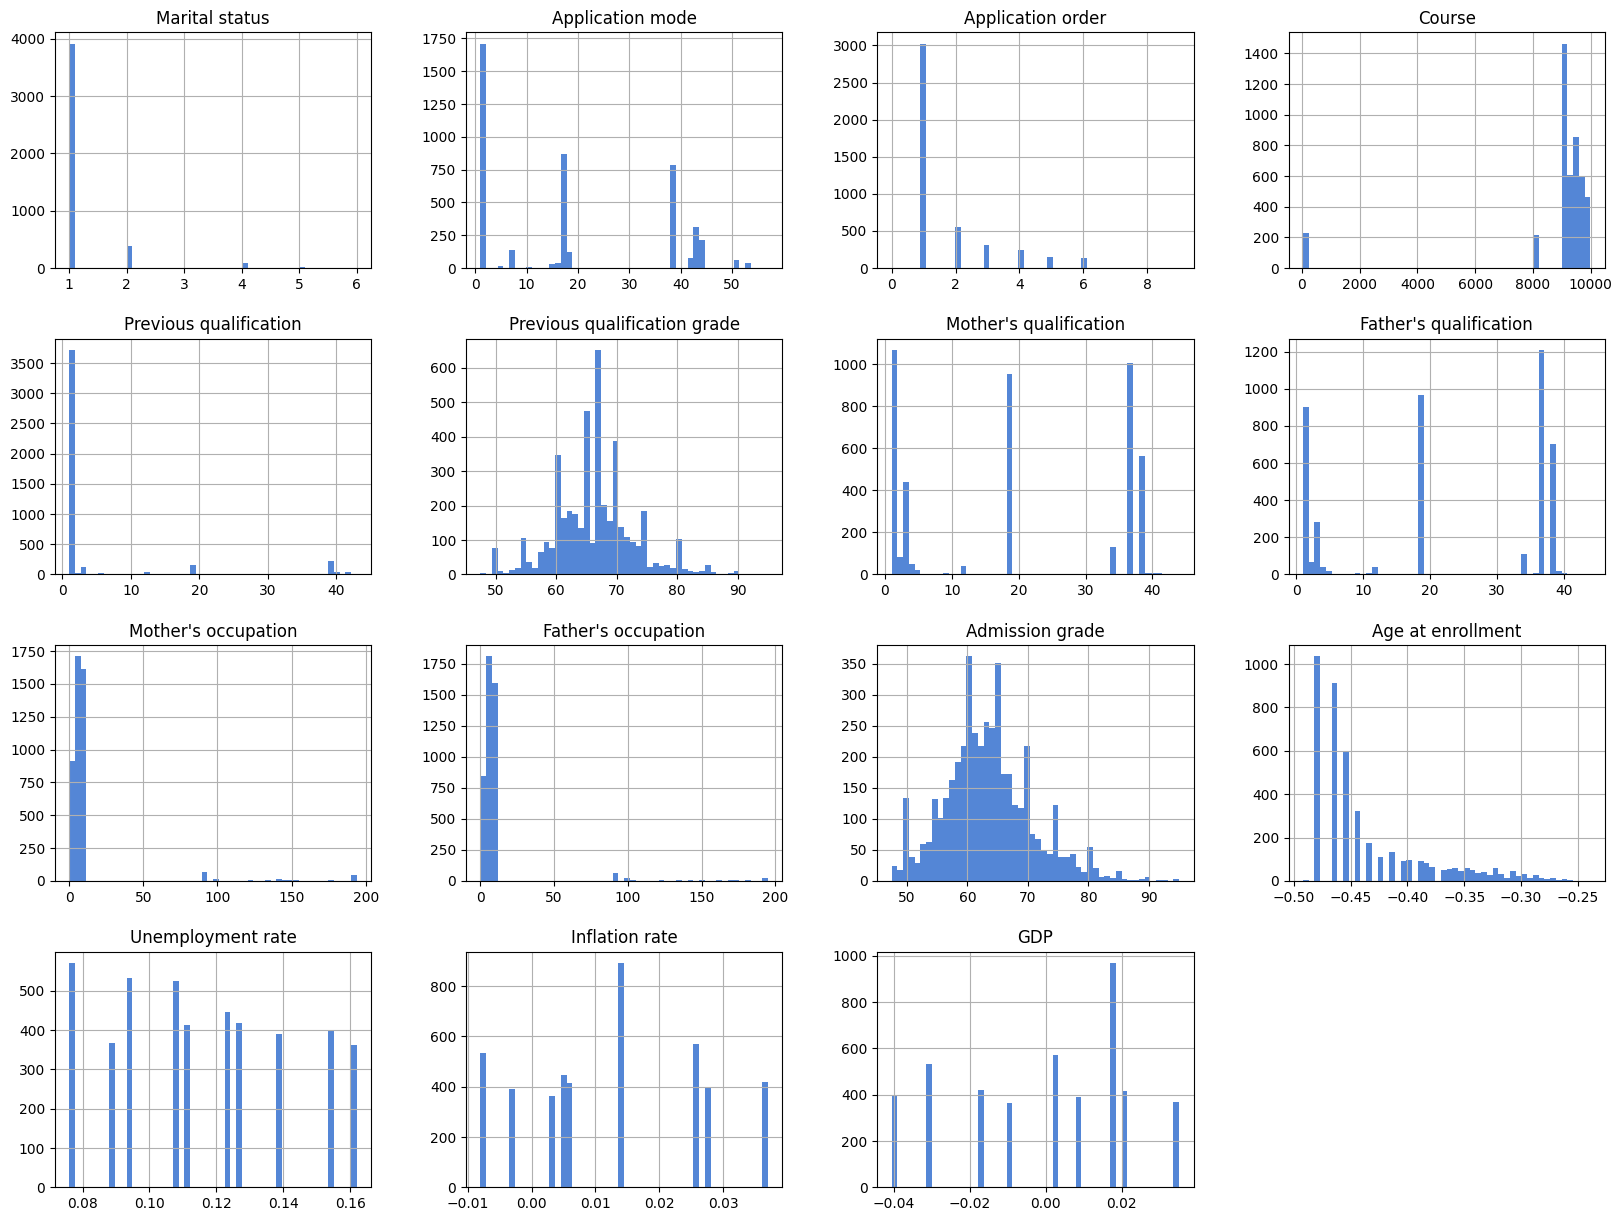

In [36]:
df[df.columns].hist(bins= 50, figsize=(20,15), color='#5486d6')
plt.show

Transforming Age at enrollment

In [ ]:
# age is skewed to the right so we will take the log

df["Age at enrollment"] = np.log(df["Age at enrollment"])


# Continous Variables Correlation

In [27]:
# Selecting continous data (just for correlation usage)
cont_df = df.select_dtypes(include=['float64'])
cont_df['Age at enrollment'] = df['Age at enrollment']
print(cont_df.head())


   Previous qualification grade  Admission grade  Age at enrollment  \
0                          61.0            63.65           4.321928   
1                          80.0            71.25           4.247928   
2                          61.0            62.40           4.247928   
3                          61.0            59.80           4.321928   
4                          50.0            70.75           5.491853   

   Unemployment rate  Inflation rate     GDP  
0              0.108           0.014  0.0174  
1              0.139          -0.003  0.0079  
2              0.108           0.014  0.0174  
3              0.094          -0.008 -0.0312  
4              0.139          -0.003  0.0079  


Checking for outliers

- No signs of outliers in grades

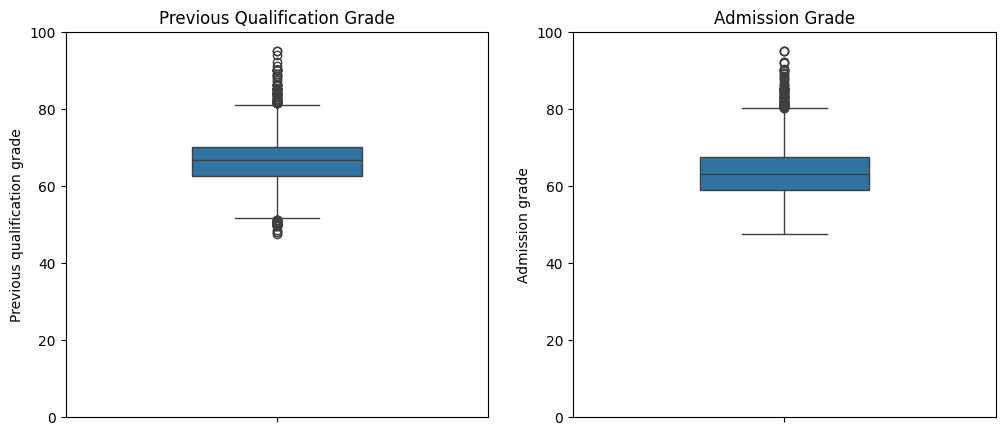

In [28]:
# Prev and Admission Grades

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot boxplots on each subplot
sns.boxplot(y=df['Previous qualification grade'], ax=axes[0], width = 0.4)
sns.boxplot(y=df['Admission grade'], ax=axes[1], width = 0.4)

# Set titles for each subplot
axes[0].set_title('Previous Qualification Grade')
axes[0].set_ylim(0, 100)

axes[1].set_title('Admission Grade')
axes[1].set_ylim(0, 100)


plt.show()

- Both unemployment and inflation rates at the year of the student's interview seem not to have any dangerous outliers. The negative inflation rates indicate periods of deflation.

C:\Users\amann\AppData\Local\Temp\ipykernel_25592\1837453363.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_dict.values(), labels=data_dict.keys())


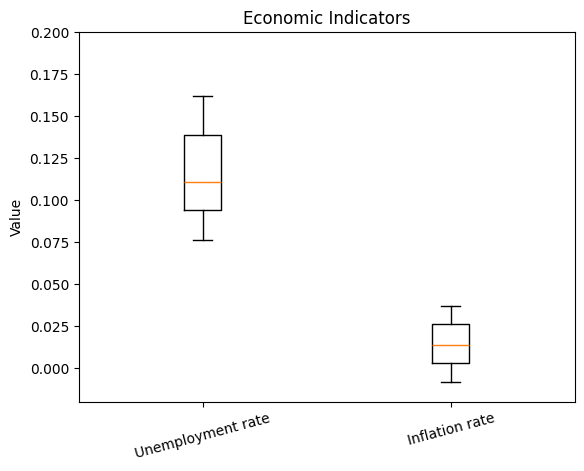

In [29]:
data_dict = {
    "Unemployment rate": df["Unemployment rate"],
    "Inflation rate": df["Inflation rate"]
}

# Creating the boxplot
plt.boxplot(data_dict.values(), labels=data_dict.keys())
plt.title("Economic Indicators")
plt.ylabel("Value")
plt.xticks(rotation=15)
plt.ylim(-0.02, 0.20)
plt.show()


Boxplot for Age
- outliers seem normal for the log(age)

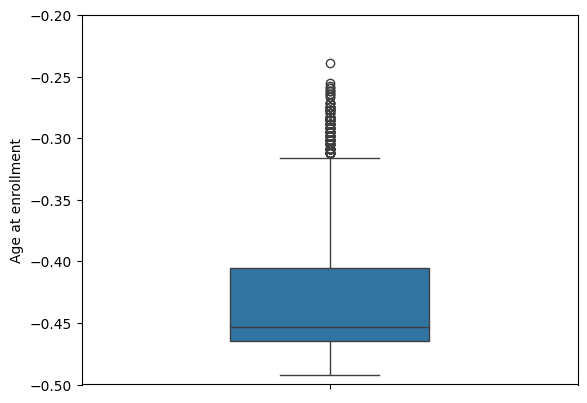

In [45]:
sns.boxplot(y=df['Age at enrollment'], width = 0.4)

plt.ylim(- 0.50, -0.20)
plt.show()

Boxplot for GDP
- no apparent outliers

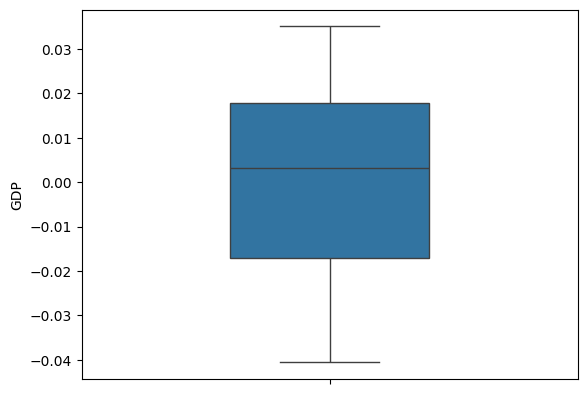

In [ ]:
sns.boxplot(y=df['GDP'], width = 0.4)

# plt.ylim(- 0.50, -0.20)
plt.show()

No signs of serious multicollinearity issue (high correlation) between variables. I would say there is no need to remove any of these variables.

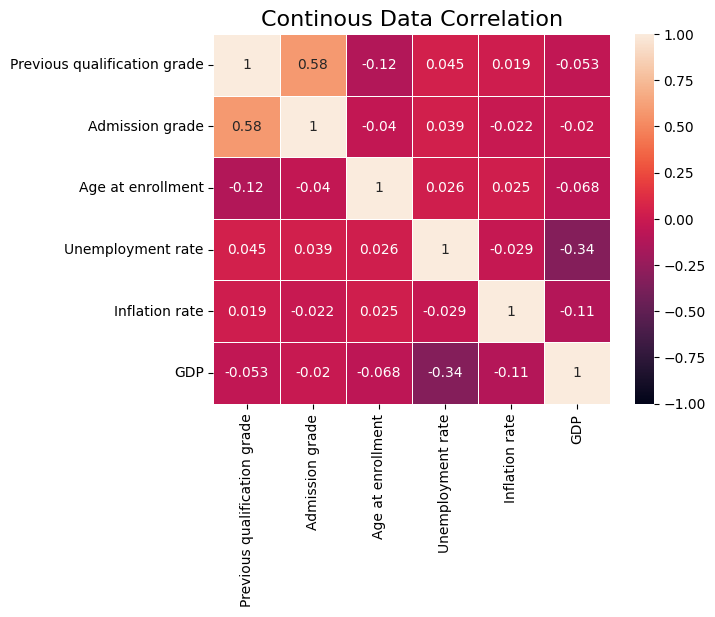

In [37]:
# Matrix plot of continous variables
    # Categorical variables contain numbers from 1 up to almost 30
    # Binary variables can be included in matrix plots but not nominal variables like metioned
    # Because Pearson's correlation assumes numeric meaning and linear meaning


tc = cont_df.corr()
sns.heatmap(tc, 
            annot = True, 
            vmin = -1,
            vmax = 1,
            linewidths = 0.5)

plt.title ("Continous Data Correlation", fontsize = 16)
plt.show()

# Nominal Data Correlation / Categorical vs Categorical
- Use Chi square test https://www.geeksforgeeks.org/python-pearsons-chi-square-test/#

In [31]:
# Selecting binary variables to remove them 
# Using ordinal data for correlation usage 
nominal_df = df
columns_to_remove = []

for col in nominal_df.columns:
    unique_values = nominal_df[col].unique()
    if len(unique_values) <= 2 and all(int(x) in [0, 1] for x in unique_values):
        columns_to_remove.append(col)

if columns_to_remove:
    nominal_df.drop(columns=columns_to_remove, axis=1, inplace=True)

# don't forget to include age in continous variables
nominal_df = df.select_dtypes(include=['int64'])
nominal_df.drop(columns= "Age at enrollment", axis=1, inplace=True)

print(nominal_df.head())


KeyError: "['Age at enrollment'] not found in axis"

Function that will test for chi-2 and return results. It will create a contingency table for all variables that are nominal without having to manually test each one against the other.

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
from itertools import combinations

def run_chi2_tests(df, categorical_vars, alpha=0.05):
    results = []

    for var1, var2 in combinations(categorical_vars, 2):
        table = pd.crosstab(df[var1], df[var2])
        try:
            stat, p, dof, expected = chi2_contingency(table)
            results.append({
                "Variable 1": var1,
                "Variable 2": var2,
                "Chi2 Stat": round(stat, 2),
                "p-value": p,
                "Degrees of Freedom": dof,
                "Dependent": p <= alpha
            })
        except Exception as e:
            results.append({
                "Variable 1": var1,
                "Variable 2": var2,
                "Error": str(e)
            })

    return pd.DataFrame(results)


Sine the number of false variables are very little, and each false one has a bunch of other correlations with other variables, we will keep them all in our model.

In [ ]:
# Nominal variables only
nominal_columns = [ 
    "Marital status", 
    "Application mode",
    "Application order",
    "Course",
    "Previous qualification",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation", 
    "Father's occupation"
]


chi2_results = run_chi2_tests(nominal_df, nominal_columns)
chi2_results

,Variable 1,Variable 2,Chi2 Stat,p-value,Degrees of Freedom,Dependent
0,Marital status,Application mode,1193.49,5.360217e-195,85,True
1,Marital status,Application order,142.84,5.628934e-15,35,True
2,Marital status,Course,697.73,2.487516e-99,80,True
3,Marital status,Previous qualification,609.15,2.182617e-82,80,True
4,Marital status,Mother's qualification,539.02,3.615419e-48,140,True
5,Marital status,Father's qualification,379.07,6.908595e-19,165,True
6,Marital status,Mother's occupation,226.41,1.609813e-04,155,True
7,Marital status,Father's occupation,217.88,6.209376e-01,225,False
8,Application mode,Application order,918.01,1.501981e-123,119,True
9,Application mode,Course,2255.79,6.961663e-309,272,True


# Matrix Plot / Continuous vs Continous & Continuous vs Categorical

We're going to have different combinations for representing the data in a matrix plot

- Continuous vs continuous

Economic factors like GDP, inflation and unemployment have no relation with grades and age. Meanwhile, previous qualification grade and admission have a strong positive relationship, log(age of enrollment) and grades have a weak negative relationship, and log(age of enrollment) with both economic factors and age has no trend.

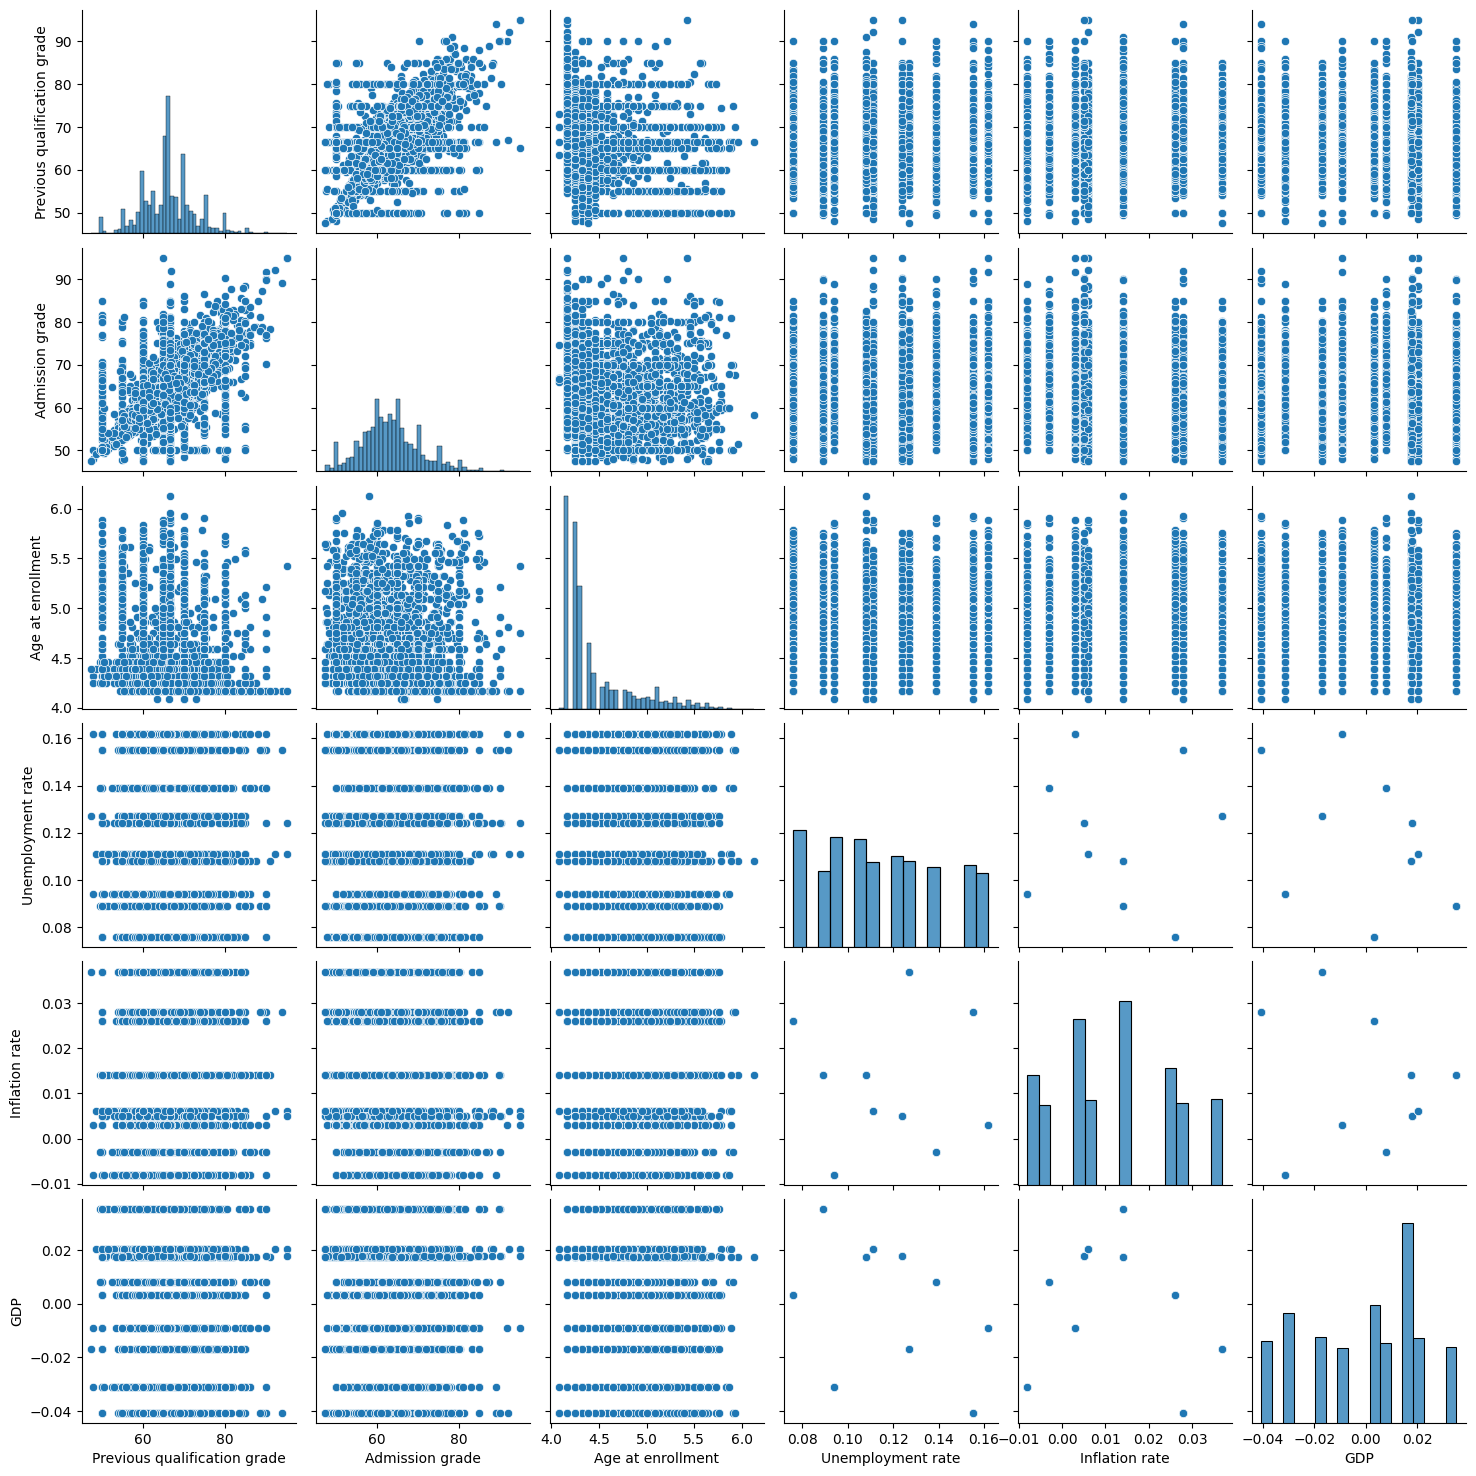

In [38]:
sns.pairplot(cont_df)

- Continuous vs categorical

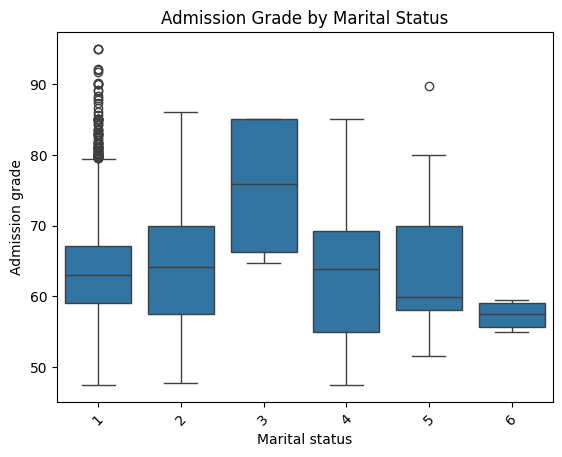

In [39]:
sns.boxplot(x='Marital status', y='Admission grade', data=df)
plt.xticks(rotation=45)  # if category labels are long
plt.title('Admission Grade by Marital Status')
plt.show()
